In [76]:
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
from pesummary.io import read
from simple_pe.param_est import SimplePESamples, pe
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [114]:
def make_comparison_hists(
    samples_dir, outdir=None, include_prior=True, ecc_prior='uniform', comp_mass_prior=True, bins=20,
    params=['chirp_mass', 'mass_ratio', 'chi_align', 'theta_jn', 'luminosity_distance', 'ecc10']
):

    # Load samples
    m_path = os.path.join(samples_dir, 'metric_samples.dat')
    m_samples = SimplePESamples(read(m_path).samples_dict)
    m_samples.generate_all_posterior_samples()
    m_samples.generate_ecc()
    p_path = os.path.join(samples_dir, 'posterior_samples.dat')
    p_samples = SimplePESamples(read(p_path).samples_dict)
    p_samples.generate_all_posterior_samples()

    # Calculate prior samples if requested
    if include_prior:
        pr_samples = m_samples
        if comp_mass_prior:
            pr_samples = pe.component_mass_prior_weight(pr_samples, ['symmetric_mass_ratio'])
        if ecc_prior == 'log-uniform':
            pr_samples = pe.loguniform_e_prior_weight(pr_samples, ['ecc10'])
        else:
            if ecc_prior != 'uniform':
                print('Eccentric prior not recognised, defaulting to uniform prior')
            pr_samples = pe.uniform_e_prior_weight(pr_samples, ['ecc10'])           

    # Make plot
    n_cols = (len(params)+1)//2
    plt.figure(figsize=(6.4*n_cols, 4.8*2))
    for i, param in enumerate(params):
        plt.subplot(2, n_cols, i+1)
        try:
            hist_range = (np.min(m_samples[param]), np.max(m_samples[param]))
            plt.hist(m_samples[param], density=True, histtype='step', range=hist_range, bins=bins, color='C0', label='metric_samples')
            if include_prior:
                plt.hist(pr_samples[param], density=True, histtype='step', range=hist_range, bins=bins, color='C2', label='prior_samples')
        except KeyError:
            hist_range = (np.min(p_samples[param]), np.max(p_samples[param]))
        plt.hist(p_samples[param], density=True, histtype='step', range=hist_range, bins=bins, color='C1', label='posterior_samples')
        plt.xlim(hist_range)
        plt.xlabel(param)
        plt.legend()

    # Save plot
    if outdir is not None:
        filename = os.path.join(outdir, 'compare_samples_debug.png')
        plt.savefig(filename)
    plt.show()

2026-02-19  19:17:59 PESummary WARNING : Failed to find 'log_likelihood' in result file. Setting every sample to have log_likelihood 0
2026-02-19  19:17:59 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2026-02-19  19:17:59 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2026-02-19  19:17:59 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
2026-02-19  19:17:59 PESummary WARNING : Could not find f_low in input file and one was not passed from the command line. Using 20.0Hz as default
2026-02-19  19:18:00 PESummary WARNING : Could not find reference_frequency in input file. Using 20Hz as default
2026-02-19  19:18:00 PESummary WARNING : Failed to find 'log_likelihood' in result file. Setting every sample to have log_likelihood 0
2026-02-19  19:18:0

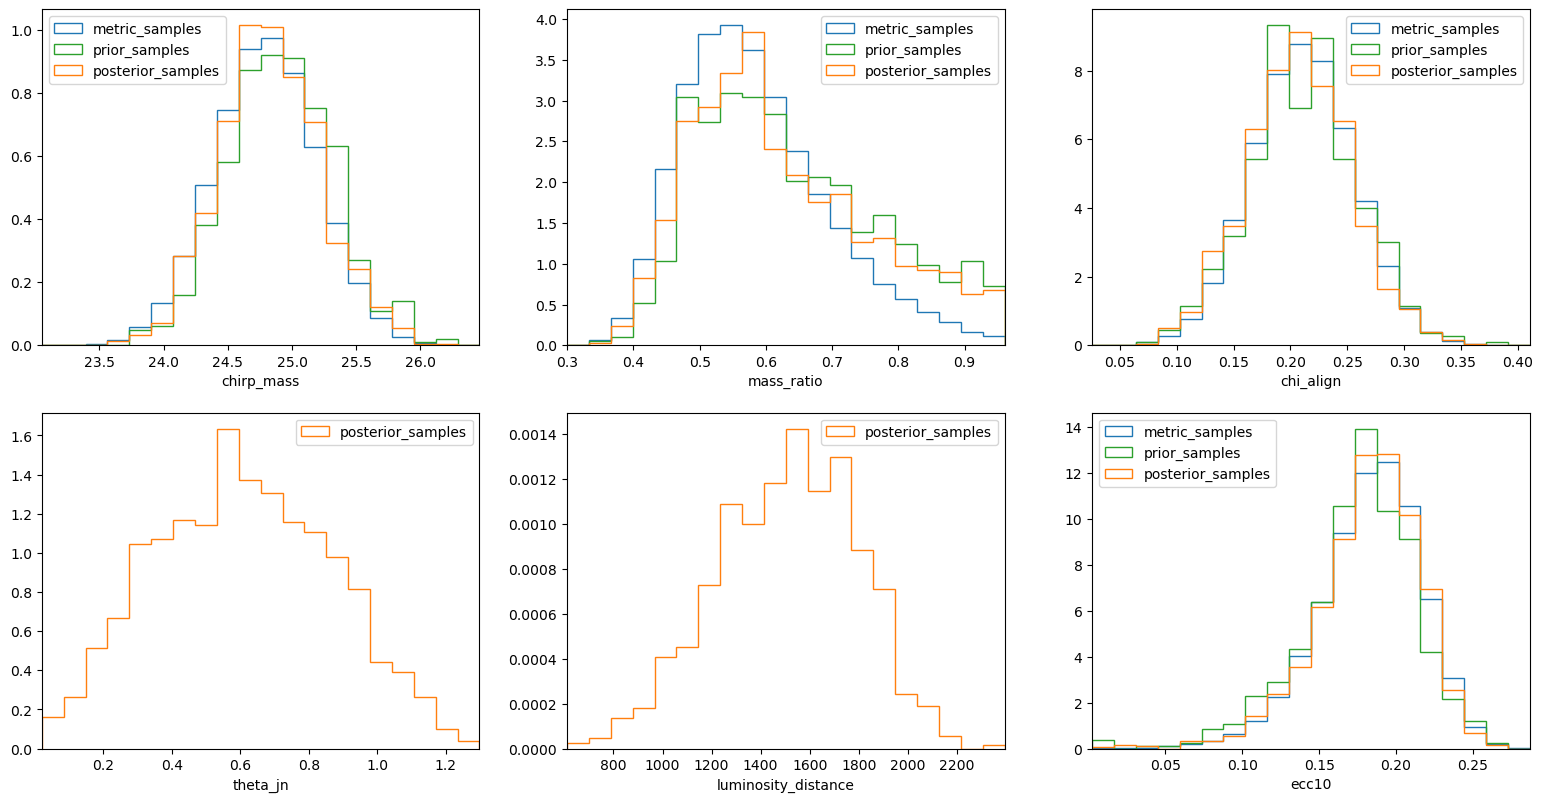

In [115]:
samples_dir = '/home/ben.patterson/projects/EccentricBinaries/notebooks/pipe_ecc_test/ecc_hm_test/outdir/output/'
make_comparison_hists(samples_dir, outdir=samples_dir)